In [37]:
from sympy import *

In [38]:
r = symbols('r', nonnegative=True)
phi = symbols('phi')

A, B = symbols('A B', negative=True)
C = symbols('C', positive=True)

theta = Rational(1, 2) * phi
q1 = Function('q_1')(r)
q2 = Function('q_2')(r)

display(q1, q2)

q_1(r)

q_2(r)

In [39]:
class MyMArray(MutableDenseNDimArray):
    
    def __mul__(self, other):
        try:
            return super().__mul__(other)
        except ValueError:
            if not isinstance(other, MyMArray):
                raise ValueError("Need MyMArray for contraction")
            
            rank_self = self.rank()
            prod = tensorproduct(self, other)
            contraction = tensorcontraction(prod, (rank_self - 1, rank_self))
            
            if type(contraction) == Array:
                return MyMArray(contraction)
            else:
                return contraction
    
    def __matmul__(self, other):
        try:
            return super().__mul__(other)
        except ValueError:
            if not isinstance(other, MyMArray):
                raise ValueError("Need MyMArray for tensor product")

            return MyMArray( tensorproduct(self, other) )
    
    def __pow__(self, other):
        try:
            return super().__mul__(other)
        except ValueError:
            if not isinstance(other, MyMArray):
                raise ValueError("Need MyMArray for double contraction")

            rank_self = self.rank()
            prod = tensorproduct(self, other)
            contract = tensorcontraction(prod, (rank_self - 1, rank_self))
            contraction = tensorcontraction(contract, (rank_self - 2, rank_self - 1))
            
            if type(contraction) == Array:
                return MyMArray(contraction)
            else:
                return contraction
        
    def ip(self, other):
        if not isinstance(other, MyMArray):
            raise ValueError("Need MyMArray for inner product")
        
        rank_self = self.rank()
        prod = tensorproduct(self, other)
        while rank_self > 0:
            prod = tensorcontraction(prod, (0, rank_self))
            rank_self -= 1
            
        return prod
    
def lap(M):
    return M.diff(r, 2) + (1/r) * M.diff(r) + (1/r**2) * M.diff(phi, 2)

In [40]:
n = MyMArray([cos(theta), sin(theta), 0])
m = MyMArray([sin(theta), -cos(theta), 0])
l = MyMArray([0, 0, 1])

In [41]:
Q_mat = (q1 * n@n + q2 * m@m - (q1 + q2) * l@l)
display(Q_mat)

[[q_1(r)*cos(phi/2)**2 + q_2(r)*sin(phi/2)**2, q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2), 0], [q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2), q_1(r)*sin(phi/2)**2 + q_2(r)*cos(phi/2)**2, 0], [0, 0, -q_1(r) - q_2(r)]]

In [42]:
lap_Q_mat = simplify(lap(Q_mat))
display(lap_Q_mat)

[[(-r**2*sin(phi/2)**2*Derivative(q_1(r), (r, 2)) + r**2*sin(phi/2)**2*Derivative(q_2(r), (r, 2)) + r**2*Derivative(q_1(r), (r, 2)) - r*sin(phi/2)**2*Derivative(q_1(r), r) + r*sin(phi/2)**2*Derivative(q_2(r), r) + r*Derivative(q_1(r), r) + q_1(r)*sin(phi/2)**2 - q_1(r)/2 - q_2(r)*sin(phi/2)**2 + q_2(r)/2)/r**2, (r**2*(Derivative(q_1(r), (r, 2)) - Derivative(q_2(r), (r, 2))) + r*(Derivative(q_1(r), r) - Derivative(q_2(r), r)) - q_1(r) + q_2(r))*sin(phi)/(2*r**2), 0], [(r**2*(Derivative(q_1(r), (r, 2)) - Derivative(q_2(r), (r, 2))) + r*(Derivative(q_1(r), r) - Derivative(q_2(r), r)) - q_1(r) + q_2(r))*sin(phi)/(2*r**2), (r**2*sin(phi/2)**2*Derivative(q_1(r), (r, 2)) - r**2*sin(phi/2)**2*Derivative(q_2(r), (r, 2)) + r**2*Derivative(q_2(r), (r, 2)) + r*sin(phi/2)**2*Derivative(q_1(r), r) - r*sin(phi/2)**2*Derivative(q_2(r), r) + r*Derivative(q_2(r), r) - q_1(r)*sin(phi/2)**2 + q_1(r)/2 + q_2(r)*sin(phi/2)**2 - q_2(r)/2)/r**2, 0], [0, 0, (r*(-Derivative(q_1(r), (r, 2)) - Derivative(q_2(r), 

In [43]:
dQ_dt = -A * Q_mat - B * Q_mat * Q_mat - C * (Q_mat**Q_mat) * Q_mat + lap(Q_mat)
# dQ_dt = simplify(dQ_dt)

display(dQ_dt)

[[-A*(q_1(r)*cos(phi/2)**2 + q_2(r)*sin(phi/2)**2) - B*(q_1(r)*cos(phi/2)**2 + q_2(r)*sin(phi/2)**2)**2 - B*(q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2))**2 - C*(q_1(r)*cos(phi/2)**2 + q_2(r)*sin(phi/2)**2)*((q_1(r)*sin(phi/2)**2 + q_2(r)*cos(phi/2)**2)**2 + (q_1(r)*cos(phi/2)**2 + q_2(r)*sin(phi/2)**2)**2 + 2*(q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2))**2 + (-q_1(r) - q_2(r))**2) + sin(phi/2)**2*Derivative(q_2(r), (r, 2)) + cos(phi/2)**2*Derivative(q_1(r), (r, 2)) + (sin(phi/2)**2*Derivative(q_2(r), r) + cos(phi/2)**2*Derivative(q_1(r), r))/r + (q_1(r)*sin(phi/2)**2 - q_1(r)*cos(phi/2)**2 - q_2(r)*sin(phi/2)**2 + q_2(r)*cos(phi/2)**2)/(2*r**2), -A*(q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2)) - B*(q_1(r)*sin(phi/2)**2 + q_2(r)*cos(phi/2)**2)*(q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2)) - B*(q_1(r)*cos(phi/2)**2 + q_2(r)*sin(phi/2)**2)*(q_1(r)*sin(phi/2)*cos(phi/2) - q_2(r)*sin(phi/2)*cos(phi/2)) - C*(q_1(r)*sin(phi/2)*

In [44]:
eq1 = dQ_dt[0, 0].subs(phi, 0)
eq2 = dQ_dt[0, 0].subs(phi, pi)

display(eq1, eq2)

-A*q_1(r) - B*q_1(r)**2 - C*((-q_1(r) - q_2(r))**2 + q_1(r)**2 + q_2(r)**2)*q_1(r) + Derivative(q_1(r), (r, 2)) + Derivative(q_1(r), r)/r + (-q_1(r) + q_2(r))/(2*r**2)

-A*q_2(r) - B*q_2(r)**2 - C*((-q_1(r) - q_2(r))**2 + q_1(r)**2 + q_2(r)**2)*q_2(r) + Derivative(q_2(r), (r, 2)) + Derivative(q_2(r), r)/r + (q_1(r) - q_2(r))/(2*r**2)

## Solving for S_bulk

In [45]:
d_ij = MyMArray(eye(3))

S = symbols('S')
n = MyMArray([1, 0, 0])
Q_uni = S * (n@n - Rational(1, 3) * d_ij)

display(Q_uni)

[[2*S/3, 0, 0], [0, -S/3, 0], [0, 0, -S/3]]

In [46]:
f_LdG = (Rational(1, 2) * A * Q_uni**Q_uni
         + Rational(1, 3) * B * Q_uni ** (Q_uni * Q_uni)
         + Rational(1, 4) * C * (Q_uni ** Q_uni)**2)
f_LdG = simplify(f_LdG)
display(f_LdG)

S**2*(9*A + 2*B*S + 3*C*S**2)/27

In [47]:
df_dS = simplify( f_LdG.diff(S) )
display(df_dS)

2*S*(3*A + B*S + 2*C*S**2)/9

In [48]:
sol = solve(df_dS / S, S)
display(sol[0], sol[1])

(-B - sqrt(-24*A*C + B**2))/(4*C)

(-B + sqrt(-24*A*C + B**2))/(4*C)

In [49]:
import math

In [50]:
def calc_S_bulk(A, B, C):
    return -B + math.sqrt(-24 * A * C + B**2) / C

## Asymptotic behavior

### $r \to \infty$

In [51]:
eq1_far = eq1.subs({q1.diff(r, 2): 0,
                    q1.diff(r, 1): 0,
                    (-q1 + q2) / (2 * r**2): 0})
eq2_far = eq2.subs({q2.diff(r, 2): 0,
                    q2.diff(r, 1): 0,
                    (q1 - q2) / (2 * r**2): 0})
display(eq1_far, eq2_far)

-A*q_1(r) - B*q_1(r)**2 - C*((-q_1(r) - q_2(r))**2 + q_1(r)**2 + q_2(r)**2)*q_1(r)

-A*q_2(r) - B*q_2(r)**2 - C*((-q_1(r) - q_2(r))**2 + q_1(r)**2 + q_2(r)**2)*q_2(r)

Since these equations are symmetric in $q_1$ and $q_2$ we've basically got two choices: solve eq(1) for $q_2$ or solve eq(2) for $q_2$ -- let's look at the difference

In [52]:
print("eq: 1")
eq1_q2_sol = solve(eq1_far, q2)
for sol in eq1_q2_sol:
    display(sol)

print("eq: 2")
eq2_q2_sol = solve(eq2_far, q2)
for sol in eq2_q2_sol:
    display(sol)

eq: 1


-q_1(r)/2 - sqrt(-2*A - 2*B*q_1(r) - 3*C*q_1(r)**2)/(2*sqrt(C))

-q_1(r)/2 + sqrt(-2*A - 2*B*q_1(r) - 3*C*q_1(r)**2)/(2*sqrt(C))

eq: 2


0

-(B + 2*C*q_1(r))/(4*C) - sqrt(-8*A*C + B**2 + 4*B*C*q_1(r) - 12*C**2*q_1(r)**2)/(4*C)

-(B + 2*C*q_1(r))/(4*C) + sqrt(-8*A*C + B**2 + 4*B*C*q_1(r) - 12*C**2*q_1(r)**2)/(4*C)

These are qualitatively different. Let's first substitute solved eq(1) to eq(2)

In [53]:
eq2_sol1_solutions = solve( simplify(eq2_far.subs(q2, eq1_q2_sol[0])), q1 )

for sol in eq2_sol1_solutions:
    display(sol)

(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

(-B - sqrt(-8*A*C + B**2))/(4*C)

(-B + sqrt(-8*A*C + B**2))/(4*C)

In [54]:
eq2_sol2_solutions = solve( simplify(eq2_far.subs(q2, eq1_q2_sol[1])), q1 )

for sol in eq2_sol2_solutions:
    display(sol)

(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

(-B - sqrt(-8*A*C + B**2))/(4*C)

(-B + sqrt(-8*A*C + B**2))/(4*C)

Hence, if we solve eq(1) for $q_2$ and plug it back into eq(2) to solve, it actually doesn't matter which solution we choose for $q_2$

Now let's try solving eq(2) and plugging back into eq(1)

In [55]:
eq1_sol1_solutions = solve( simplify(eq1_far.subs(q2, eq2_q2_sol[0])), q1 )

for sol in eq1_sol1_solutions:
    display(sol)

0

(-B - sqrt(-8*A*C + B**2))/(4*C)

(-B + sqrt(-8*A*C + B**2))/(4*C)

In [56]:
eq1_sol2_solutions = solve( simplify(eq1_far.subs(q2, eq2_q2_sol[1])), q1 )

for sol in eq1_sol2_solutions:
    display(sol)

0

(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

In [57]:
eq1_sol3_solutions = solve( simplify(eq1_far.subs(q2, eq2_q2_sol[2])), q1 )

for sol in eq1_sol3_solutions:
    display(sol)

0

(-B + sqrt(-24*A*C + B**2))/(12*C)

I guess the only difference happens if we choose $q_2 = 0$

Let's check the symmetry by plugging back in

In [58]:
simplify( eq1_q2_sol[0].subs(q1, eq2_sol1_solutions[0]) )

(B + sqrt(-24*A*C + B**2) - 3*sqrt(2)*sqrt(-12*A*C + B**2 + B*sqrt(-24*A*C + B**2)))/(24*C)

Given this, we have two choices each (excluding the trivial case of $q_1 = q_2 = 0$). 
Let's start with substituting back into eq(1)

In [110]:
eq2_far_subs1 = expand(eq2_far.subs(q2, eq1_q2_sol[0]))
eq2_far_subs2 = expand(eq2_far.subs(q2, eq1_q2_sol[1]))
display(eq2_far_subs1, eq2_far_subs2)

A*B/(2*C) + B**2*q_1(r)/(2*C) - B*sqrt(-2*A*C - 2*B*C*q_1(r) - 3*C**2*q_1(r)**2)*q_1(r)/C

A*B/(2*C) + B**2*q_1(r)/(2*C) + B*sqrt(-2*A*C - 2*B*C*q_1(r) - 3*C**2*q_1(r)**2)*q_1(r)/C

And then solving each of these for $q_1$

In [114]:
eq2_q1_sol1 = solve(eq2_far_subs1, q1)
eq2_q1_sol2 = solve(eq2_far_subs2, q1)
print("q1 sol 1")
for sol in eq2_q1_sol1:
    display(sol)
    
print("q1 sol 2")
for sol in eq2_q1_sol2:
    display(sol) 

q1 sol 1


(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

(-B - sqrt(-8*A*C + B**2))/(4*C)

(-B + sqrt(-8*A*C + B**2))/(4*C)

q1 sol 2


(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

(-B - sqrt(-8*A*C + B**2))/(4*C)

(-B + sqrt(-8*A*C + B**2))/(4*C)

Okay, here we get the same 4 solutions regardless of which previous solution we choose

Now we may try to substitute back into eq(2)

In [115]:
eq1_far_subs1 = expand(eq1_far.subs(q2, eq2_q2_sol[0]))
eq1_far_subs2 = expand(eq1_far.subs(q2, eq2_q2_sol[1]))
eq1_far_subs3 = expand(eq1_far.subs(q2, eq2_q2_sol[2]))

display(eq1_far_subs1, eq1_far_subs2, eq1_far_subs3)

-A*q_1(r) - B*q_1(r)**2 - 2*C*q_1(r)**3

-B**2*q_1(r)/(4*C) - 3*B*q_1(r)**2/2 - B*sqrt(-8*A*C + B**2 + 4*B*C*q_1(r) - 12*C**2*q_1(r)**2)*q_1(r)/(4*C)

-B**2*q_1(r)/(4*C) - 3*B*q_1(r)**2/2 + B*sqrt(-8*A*C + B**2 + 4*B*C*q_1(r) - 12*C**2*q_1(r)**2)*q_1(r)/(4*C)

In [116]:
eq1_q1_sol1 = solve(eq1_far_subs1, q1)
eq1_q1_sol2 = solve(eq1_far_subs2, q1)
eq1_q1_sol3 = solve(eq1_far_subs3, q1)
print("q1 sol 1")
for sol in eq1_q1_sol1:
    display(sol)
    
print("q1 sol 2")
for sol in eq1_q1_sol2:
    display(sol)
    
print("q1 sol 3")
for sol in eq1_q1_sol3:
    display(sol) 

q1 sol 1


0

-B/(4*C) - sqrt(-8*A*C + B**2)/(4*C)

-B/(4*C) + sqrt(-8*A*C + B**2)/(4*C)

q1 sol 2


0

(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

q1 sol 3


0

(-B - sqrt(-24*A*C + B**2))/(12*C)

(-B + sqrt(-24*A*C + B**2))/(12*C)

Of these we only get 4 (plus the trivial solution), and these are the same 4 as before. 

Given that $B < 0$, we have two pairs of solution, of which each pair contains a positive and negative solution.

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def eq1(ac_b):
    return (1 + np.sqrt(24*ac_b + 1)) / 12

def eq2(ac_b):
    return (1 + np.sqrt(8*ac_b + 1)) / 4

def eq3(ac_b):
    return (1 - np.sqrt(24*ac_b + 1)) / 12

def eq4(ac_b):
    return (1 - np.sqrt(8*ac_b + 1)) / 4

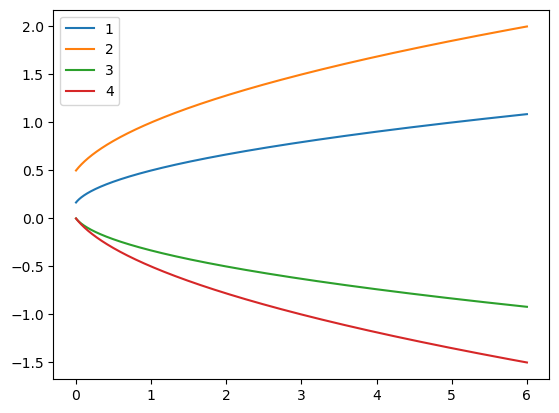

In [124]:
ac_b = np.linspace(0, 6, num=1000)

plt.plot(ac_b, eq1(ac_b), label='1')
plt.plot(ac_b, eq2(ac_b), label='2')
plt.plot(ac_b, eq3(ac_b), label='3')
plt.plot(ac_b, eq4(ac_b), label='4')

plt.legend()
plt.show()

In [98]:
q1_sol = solve(eq1_far_subs, q1)
display(q1_sol)

[0, (-B - sqrt(-24*A*C + B**2))/(12*C), (-B + sqrt(-24*A*C + B**2))/(12*C)]

In [92]:
simplify(q2_sol[0].subs(q1, q1_sol[3]))

(B - sqrt(-8*A*C + B**2) - sqrt(2)*sqrt(-4*A*C + B**2 - B*sqrt(-8*A*C + B**2)))/(8*C)

In [87]:
sol[1] * Rational(2, 3)

(-B + sqrt(-24*A*C + B**2))/(6*C)

## Solving bvp numerically

In [16]:
display(dQ_dt[0, 0].subs(phi, 0), dQ_dt[0, 0].subs(phi, pi))

-A*q_1(r) - B*q_1(r)**2 - C*((-q_1(r) - q_2(r))**2 + q_1(r)**2 + q_2(r)**2)*q_1(r) + Derivative(q_1(r), (r, 2)) + Derivative(q_1(r), r)/r + (-q_1(r) + q_2(r))/(2*r**2)

-A*q_2(r) - B*q_2(r)**2 - C*((-q_1(r) - q_2(r))**2 + q_1(r)**2 + q_2(r)**2)*q_2(r) + Derivative(q_2(r), (r, 2)) + Derivative(q_2(r), r)/r + (q_1(r) - q_2(r))/(2*r**2)

* First, need to rewrite as vector differential equation
* Will be 4D to make it first order
* Call $y = \left[q_1, q_2, q_1', q_2'\right]^T$
* Call $f = \begin{bmatrix}
                q_1' \\ 
                q_2' \\
                -\frac{1}{r} q_1' 
                + \frac{1}{2 r^2} (q_1 - q_2)
                + A q_1 + B q_1^2 + C \left( (q_1 + q_2)^2 + q_1^2 + q_2^2 \right)q_1 \\
                - \frac{1}{r} q_2'
                + \frac{1}{2 r^2} (q_2 - q_1)
                + A q_2 + B q_2^2 + C \left( (q_1 + q_2)^2 + q_1^2 + q_2^2 \right)q_2
             \end{bmatrix}$
* Then $\frac{dy}{dr} = f$

* More explicitly:
* $f = \begin{bmatrix}
            y_2 \\
            y_3 \\
            -\frac{1}{x} y_2 
            + \frac{1}{2x^2} (y_0 - y_1)
            + A y_0 + B y_0^2 + 2C (y_0^2 + y_1^2 + y_0 y_1) y_0 \\
            -\frac{1}{x} y_3 
            + \frac{1}{2x^2} (y_1 - y_0)
            + A y_1 + B y_1^2 + 2C (y_0^2 + y_1^2 + y_0 y_1) y_1
       \end{bmatrix}$

* Note: we want to solve this as an initial value problem, where we start at some far-away distance $x_0$ with values $q_1(x_0) = q_2(x_0) = S_\text{bulk}$, and $q_1'(x_0) = q_2'(x_0) = 0$.
* Thus we take $x \to x_0 - x \implies d/dx \to -d/dx$. Making this substitution we get:
* $f = \begin{bmatrix}
            -y_2 \\
            -y_3 \\
            -\frac{1}{x - x_0} y_2 
            + \frac{1}{2(x - x_0)^2} (y_0 - y_1)
            + A y_0 + B y_0^2 + 2C (y_0^2 + y_1^2 + y_0 y_1) y_0 \\
            -\frac{1}{x - x_0} y_3 
            + \frac{1}{2(x - x_0)^2} (y_1 - y_0)
            + A y_1 + B y_1^2 + 2C (y_0^2 + y_1^2 + y_0 y_1) y_1
       \end{bmatrix}$

In [17]:
def fun(x, y, A, B, C, x0):
    
    dy = np.zeros(y.shape)
    
    dy[0] = -y[2]
    dy[1] = -y[3]
    dy[2] = (-1/(x - x0) * y[2] 
                + 1 / (2 * (x - x0)**2) * (y[0] - y[1])
                + A * y[0] 
                + B * y[0]**2 
                + 2 * C * (y[0]**2 + y[1]**2 + y[0] * y[1]) * y[0])
    dy[3] = (-1/(x - x0) * y[3] 
                + 1 / (2 * (x - x0)**2) * (y[1] - y[0])
                + A * y[1] 
                + B * y[1]**2 
                + 2 * C * (y[0]**2 + y[1]**2 + y[0] * y[1]) * y[1])
    
    return dy

In [18]:
from scipy.integrate import ode
import numpy as np

In [28]:
A = -0.064
B = -1.57
C = 1.29

S_bulk = calc_S_bulk(A, B, C)

y0 = np.array([S_bulk, -0.5 * S_bulk, 0, 0])
x0 = 0

xf = 10
dx = 0.001

In [29]:
r = ode(fun)
r.set_initial_value(y0, x0).set_f_params(A, B, C, xf)

x = []
y = []
while r.successful() and r.t < xf:
    x.append(r.t + dx)
    y.append(r.integrate(r.t + dx))
    print(r.t + dx, r.integrate(r.t + dx))

0.002 [ 3.20450573 -1.60222866  0.094758   -0.07158917]
0.004 [ 3.20422146 -1.60201389  0.18951623 -0.14317804]
0.006 [ 3.20374768 -1.60165596  0.28425593 -0.21475197]
0.008 [ 3.20308446 -1.6011549   0.37895838 -0.28629635]
0.010000000000000002 [ 3.20223189 -1.6005108   0.47360488 -0.35779656]
0.012000000000000004 [ 3.20119009 -1.59972376  0.56817675 -0.42923802]
0.014000000000000005 [ 3.19995924 -1.5987939   0.6626554  -0.50060623]
0.016000000000000007 [ 3.19853954 -1.59772139  0.75702226 -0.57188668]
0.01800000000000001 [ 3.19693124 -1.59650642  0.8512588  -0.6430649 ]
0.02000000000000001 [ 3.19513461 -1.59514921  0.94534667 -0.71412656]
0.022000000000000013 [ 3.19314996 -1.59365     1.03926755 -0.78505738]
0.024000000000000014 [ 3.19097766 -1.59200907  1.1330032  -0.85584309]
0.026000000000000016 [ 3.18861808 -1.59022673  1.22653553 -0.92646957]
0.028000000000000018 [ 3.18607166 -1.58830331  1.31984661 -0.99692284]
0.03000000000000002 [ 3.18333886 -1.58623917  1.41291858 -1.06718894

 DVODE--  Warning..internal T (=R1) and H (=R2) are
       such that in the machine, T + H = T on the next step  
       (H = step size). solver will continue anyway
      In above,  R1 =  0.9999999999999D+01   R2 =  0.8588968140230D-15
 DVODE--  Above warning has been issued I1 times.  
       it will not be issued again for this problem
      In above message,  I1 =         2


In [30]:
import matplotlib.pyplot as plt

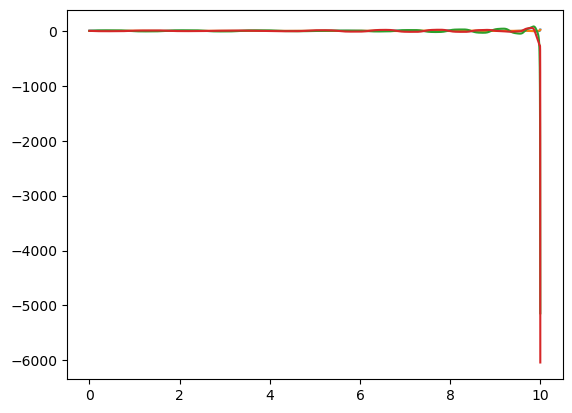

In [31]:
plt.plot(x, y)
plt.show()